In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os

import torch
import torch.nn as nn
import torch.optim as optim
import time
import importlib

import coefficient
importlib.reload(coefficient)
from coefficient import *

import utils
importlib.reload(utils)
from utils import approx_m, plot_learning_summary

from triplet import bm_triplet

import shadow_market
importlib.reload(shadow_market)
from shadow_market import Shadow_Price

## To tun then method

Choose arcoding to the abreviations in my thesis:

In [8]:
hidden_formular = 'unexplicit' #choose from \{'unexplicit','explicit'\}
method='oracle' #choose from \{'oracle','baseline'}\
nn_in_dim=3 #choose from \{2,3\} where 2 corresponds to the input Y and 3 to (Y,m)
activation='non_relu'# choose from \{'non_relu,'relu\}

In [ ]:
shadow_price = Shadow_Price(learn_s=True,x=100,hidden_formular=hidden_formular ,method=method,nn_in_dim=nn_in_dim,smooth_f = True,smooth_ddf=True,activation='non_relu')
shadow_price.train(3*10**3,lrs=[1e-3],plot=False,show_plot=200,plot_loss=True,interstep=1000)

## To save the plots and the trained neural networks in \results

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:541: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


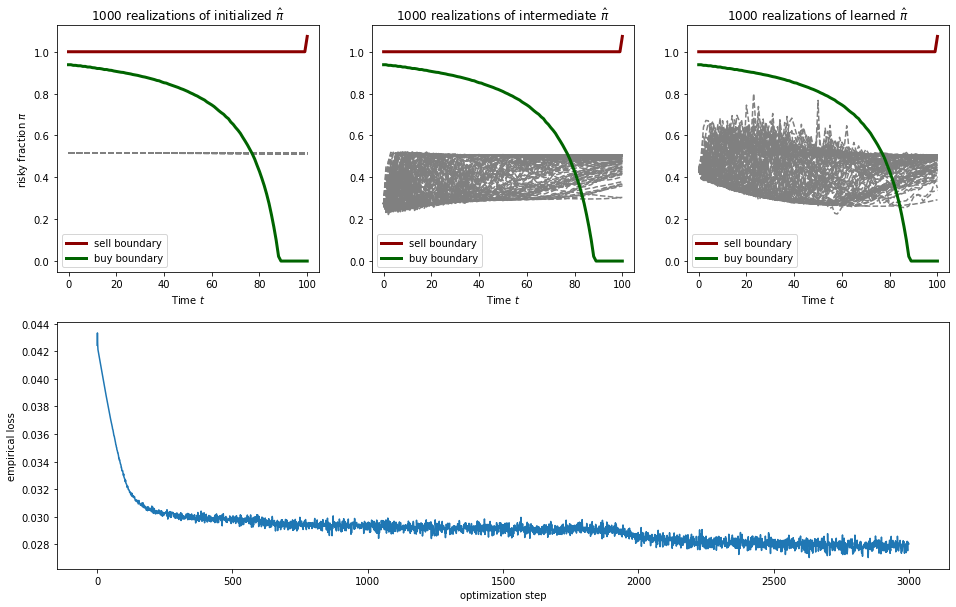

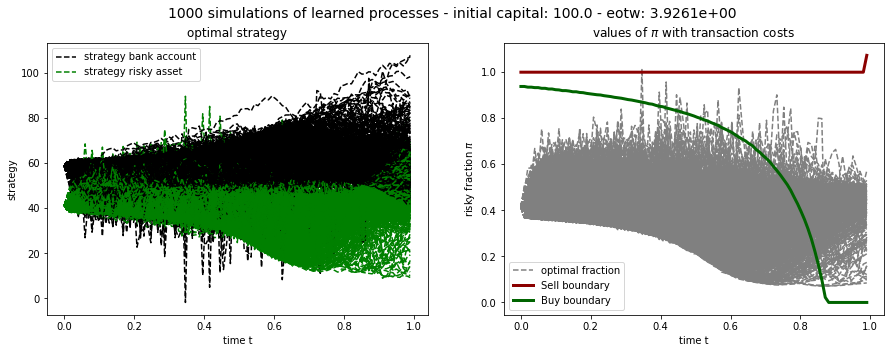

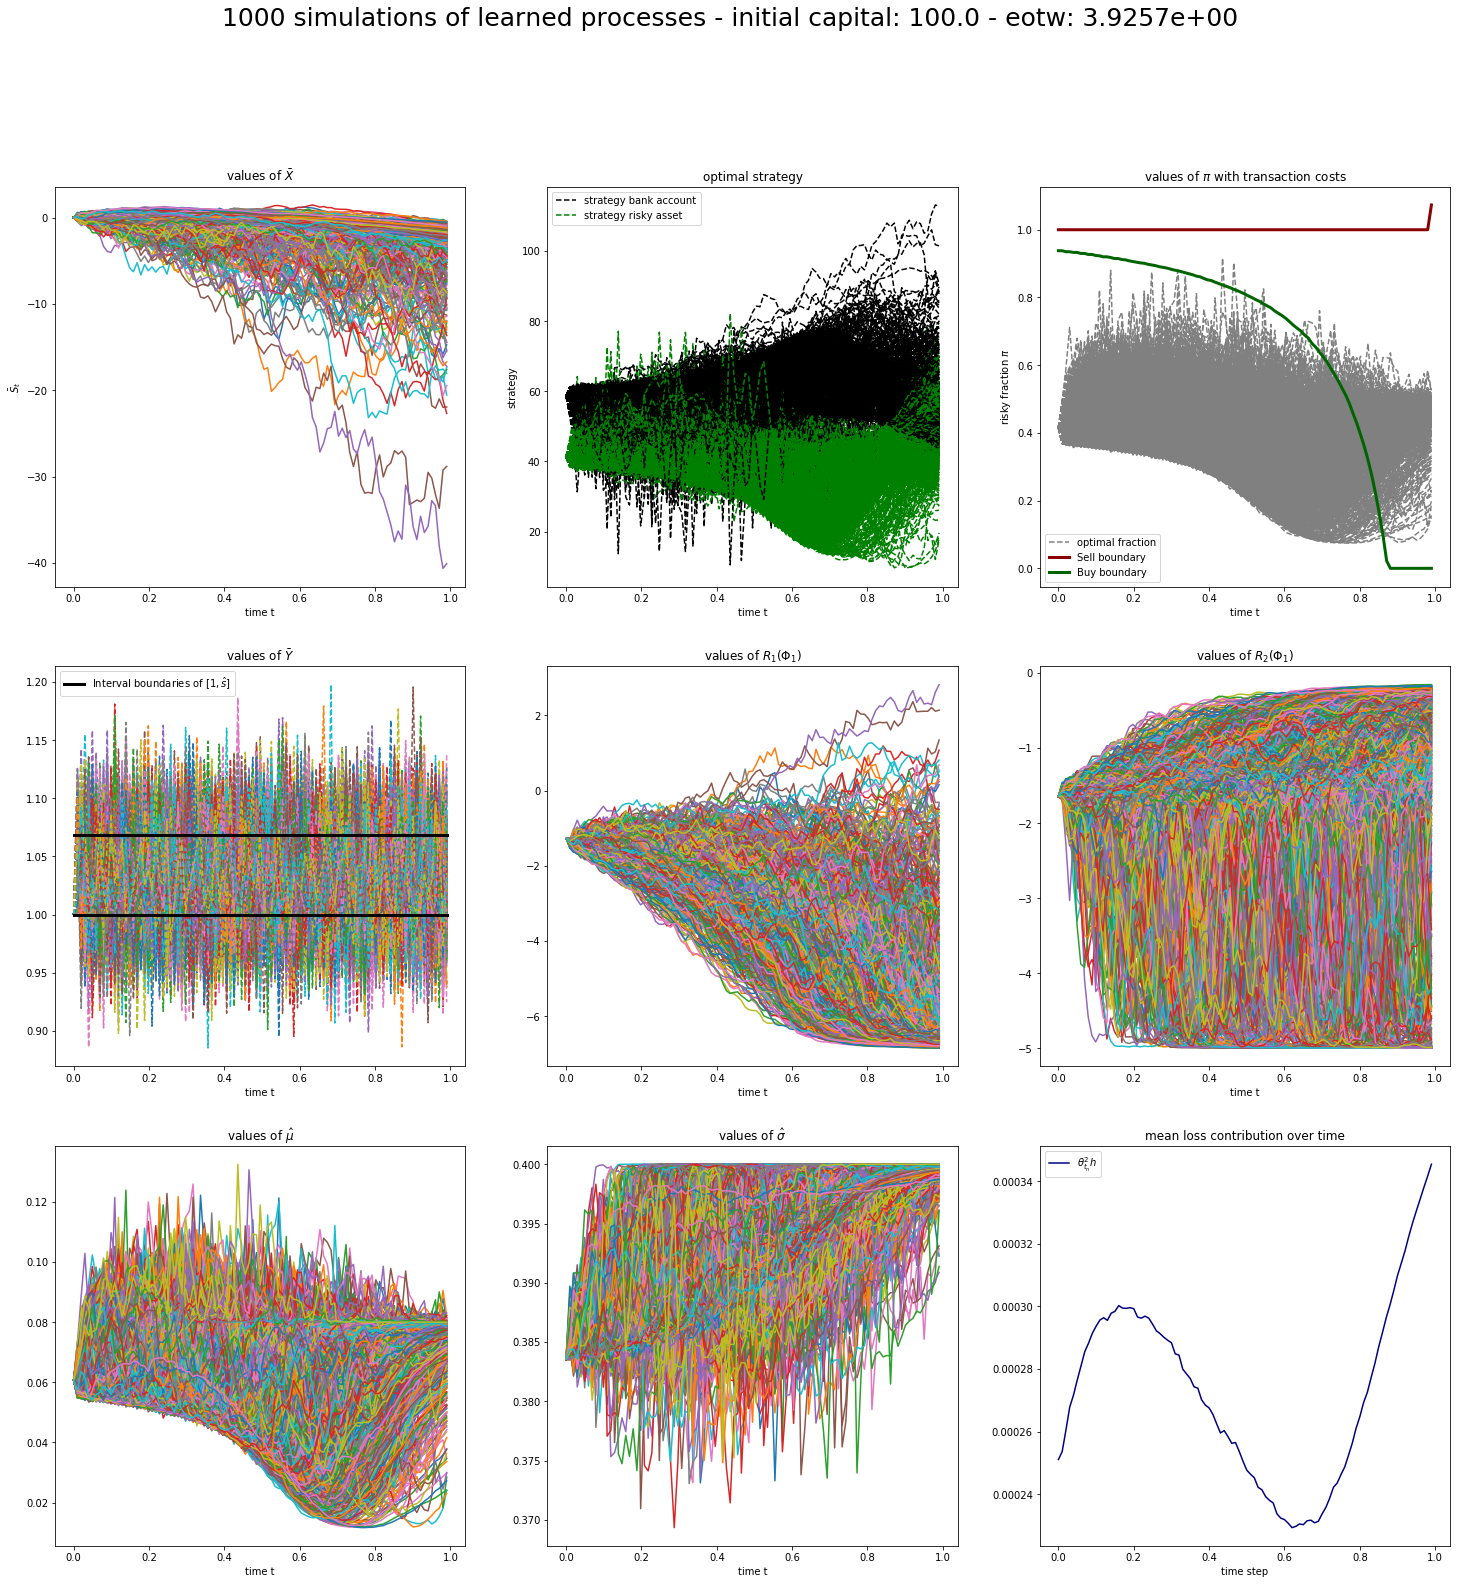

For initial capital 100.0000 the expected utility of the terminal wealth is 3.9257e+00


C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:502: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [105]:
name='Name'+shadow_price.stamp

directory1 ='./results/%s/'%(name)
directory2 ='./results/%s/trained_nn/'%(name)

directory3 = './results/%s/intermediate_pi/'%(name)

if not os.path.exists(directory1):
            os.makedirs(directory1)
        
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
if not os.path.exists(directory3):
    os.makedirs(directory3)

PATH_drift = './results/%s/trained_nn/drift.pth'%(name)
torch.save(shadow_price.drift.state_dict(), PATH_drift)

PATH_diffusion = './results/%s/trained_nn/diffusion.pth'%(name)
torch.save(shadow_price.diffusion.state_dict(), PATH_diffusion)

PATH_s = './results/%s/trained_nn/s.pth'%(name)
torch.save(shadow_price.s, PATH_s)

PATH_training = './results/%s/train_loss.pt'%(name)
torch.save(torch.tensor(shadow_price.training_loss),PATH_training)

for (i,pi) in  enumerate(shadow_price.intermediate_pi):
    PATH_pi_i = './results/%s/intermediate_pi/_%i.pt'%(name,i)
    torch.save(torch.tensor(pi),PATH_pi_i)
    
poi = []
poi.append(shadow_price.intermediate_pi[0]) 
poi.append(shadow_price.intermediate_pi[1]) 
poi.append(shadow_price.intermediate_pi[-1])

plot_learning_summary(shadow_price.training_loss,SellBoundary,BuyBoundary,poi,name=name,save=True)
shadow_price.plot_strategy_and_fraction(1000,name=name,save=True)
shadow_price.plot_processes(1000,save=True,name=name)

eotw_prediction = torch.zeros(10)

for i in range(10):
    X, S, P, ETW, PI, PI_t, SB, SR, LOSS, A, B, Y = shadow_price.predict(1000)
    eotw_prediction[i] = ETW

mean_prediction = torch.mean(eotw_prediction).item()
std_prediction = torch.std(eotw_prediction).item()

lines = ['mean of prediction of eotw: %s\n'%(str(mean_prediction)),'std of prediction of eotw: %s'%(str(std_prediction)),]
with open('./results/%s/mean_std_eotw.txt'%(name), 'w') as f:
    f.writelines(lines)

## To load a pretrained neural network

In [6]:
'''
shadow_price = Shadow_Price(learn_s=True,x=100,hidden_formular='unexplicit',nn_in_dim=2,smooth_f=True,smooth_ddf=True)

PATH_drift = './results/%s/trained_nn/drift.pth'%(name)
PATH_diffusion = './results/%s/trained_nn/diffusion.pth'%(name)
PATH_s = './results/%s/trained_nn/s.pth'%(name)

shadow_price.drift.load_state_dict(torch.load(PATH_drift))
shadow_price.diffusion.load_state_dict(torch.load(PATH_diffusion))
shadow_price.s = torch.load(PATH_s)
'''

NameError: name 'name' is not defined